In [37]:
using Distributions
using KernelDensity
using LinearAlgebra
dot2(x) = dot(x, x)
using Optim
using Random
using StatsFuns
using StatsPlots
default(fmt=:png, titlefontsize=10, tickfontsize=6, guidefontsize=8, legendfontsize=8)

In [45]:
signeddistlinepoint(a, b, x, y) = (y - (a + b*x))/√(1^2 + b^2)

function plot_ols(; n = 1000,
        distx = Normal(0, 2),
        a = 1.0, b = 1.0, F = x -> a+b*x,
        _distu = Gamma(2, 1), distu = _distu - mean(_distu),
        qthreshold = 0.01,
        xlim=quantile.(distx, (qthreshold, 1-qthreshold)))
    x = rand(distx, n)
    y = @. F(x) + rand(distu)

    @show distx
    @show distu
    @show n
    println()
    
    X = x .^ (0:1)'
    @show β̂_true = [a, b]
    @show β̂ = X \ y
    println()
    
    ŷ = X * β̂
    @show σ_true = √var(distu)
    @show √(dot2(y - ŷ)/(n - size(X, 2)))
    
    P0 = plot(distu; label="", c=3, ls=:dashdot)
    title!("true distribution of residuals")
    
    P1 = scatter(x, y; label="data: (x, y)", msc=:auto, alpha=0.5, ms=2)
    plot!(x -> [1,x]'*β̂; label="simple regression line: (x, ŷ)", lw=1.5)

    P2 = scatter(x, y - ŷ; label="", msc=:auto, alpha=0.5, ms=2)
    hline!([0]; label="", lw=1.5)
    plot!(xguide="x")
    title!("residuals: (x, y - ŷ)")

    P3 = stephist(y - ŷ; norm=true, label="histogram of residuals y - ŷ")
    plot!(fit(Normal, y - ŷ); label="normal approximation", ls=:dash)
    plot!(distu; label="true distribution of residuals", ls=:dashdot)

    ylim = quantile.((y - ŷ,), (qthreshold, 1-qthreshold))
    ikx = InterpKDE(kde(x))
    ikxy = InterpKDE(kde((x, y-ŷ)))
    f(x, y) = pdf(ikxy, x, y) / pdf(ikx, x)
    xs = range(xlim..., 20)
    ys = range(ylim..., 20)

    perm = sortperm(x)
    P4 = scatter(1:n, (y - ŷ)[perm]; label="", msc=:auto, alpha=0.5, ms=2)
    hline!([0]; label="", lw=1.5)
    plot!(xguide="rank of x")
    title!("residuals: (rank of x, y - ŷ)")
    
    P5 = heatmap(xs, ys, f; colorbar=false)
    hline!([0]; label="", c=:cyan)
    title!("KDE of conditional distribution of residuals")
    
    d = signeddistlinepoint.(β̂[1], β̂[2], x, y)
    P6 = scatter(x, d; label="", msc=:auto, alpha=0.5, ms=2)
    hline!([0]; label="", lw=1.5)
    plot!(xguide="x")
    title!("signed distances between regression line and (x[i], y[i])")
    
    P7 = stephist(d; norm=true, label="histogram of signed distances")
    plot!(fit(Normal, d); label="normal approximation", ls=:dash)

    plot(P0, P1, P2, P3, P4, P5, P6, P7; size=(800, 1200), legend=:outertop, layout=(4, 2))
end

plot_ols (generic function with 1 method)

distx = Normal{Float64}(μ=0.0, σ=2.0)
distu = LocationScale{Float64, Continuous, Gamma{Float64}}(
μ: -2.0
σ: 1.0
ρ: Gamma{Float64}(α=2.0, θ=1.0)
)

n = 1000

β̂_true = [a, b] = [1.0, 1.0]
β̂ = X \ y = [1.0394821094444138, 1.0151784289355843]

σ_true = √(var(distu)) = 1.4142135623730951
√(dot2(y - ŷ) / (n - size(X, 2))) = 1.421868582684203


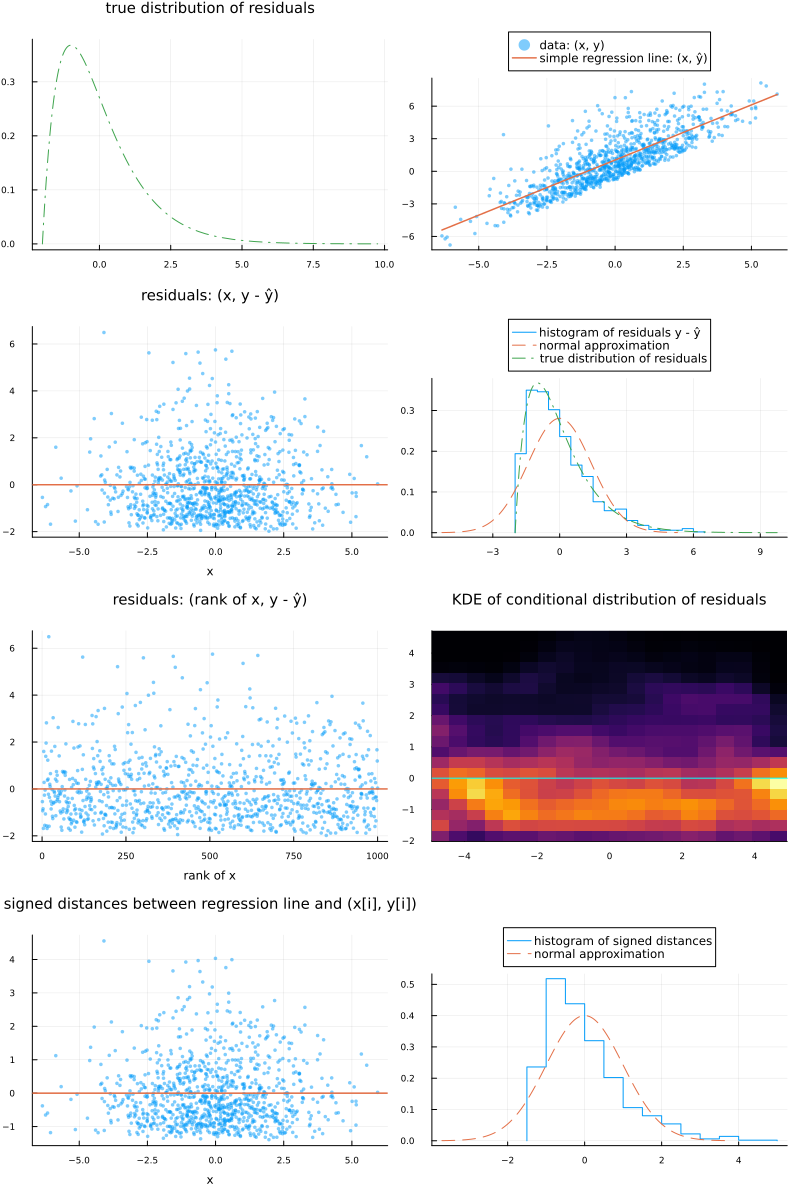

In [46]:
plot_ols()